# **Connect to Bigquery**

In [ ]:
#Neccessary Libraries
from google.cloud import bigquery
from google.colab import auth

#authenticate
auth.authenticate_user()

#initialize the client for Bigquery
project_id = 'keen-phalanx-396514'
client = bigquery.Client(project_id, location='US')

**Get the dataset and table**

In [ ]:
# Get the dataset and 1st table
dataset_ref = client.dataset('EmployeeData', project=project_id)
dataset = client.get_dataset(dataset_ref)
table_ref = dataset.table('tbl_hr_data')
table = client.get_table(table_ref)
table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

In [ ]:
# 2nd Table
new_table_ref = dataset.table('tbl_new_employees')
new_table = client.get_table(new_table_ref)
new_table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

**Convert to dataframe**

In [ ]:
#convert to dataframe
df = client.list_rows(table=table).to_dataframe()
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.36,0.56,2,132,3,0,1,0,IT,medium,EMP00064
1,0.74,0.99,2,277,3,0,1,0,IT,medium,EMP00071
2,0.45,0.53,2,155,3,0,1,0,IT,low,EMP00142
3,0.40,0.53,2,151,3,0,1,0,IT,low,EMP00215
4,0.36,0.51,2,155,3,0,1,0,IT,low,EMP00216
5,0.36,0.48,2,158,3,0,1,0,IT,low,EMP00217
6,0.43,0.53,2,131,3,0,1,0,IT,low,EMP00219
7,0.41,0.49,2,146,3,0,1,0,IT,low,EMP00293
8,0.38,0.51,2,146,3,0,1,0,IT,medium,EMP00296
9,0.45,0.55,2,151,3,0,1,0,IT,medium,EMP00301


In [ ]:
#convert to dataframe
df2 = client.list_rows(table=new_table).to_dataframe()
df2.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.331690,0.847953,6,151,4,0,0,0,IT,low,NE15014
1,0.468434,0.169659,5,303,4,0,0,0,IT,low,NE15015
2,0.858448,0.918311,4,162,6,1,0,0,IT,low,NE15064
3,0.056211,0.322600,2,229,5,1,0,0,IT,low,NE15086
4,0.382648,0.434348,4,260,3,1,0,0,hr,low,NE15021
5,0.887892,0.824672,4,245,3,1,0,0,hr,low,NE15099
6,0.827268,0.779616,7,224,2,0,0,0,sales,low,NE15034
7,0.627046,0.160653,2,227,10,1,0,0,sales,low,NE15038
8,0.205280,0.616096,6,153,3,1,0,1,sales,low,NE15059
9,0.706510,0.257276,4,193,3,0,0,0,sales,low,NE15101


# **Build Model**

***Install Pycaret***

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.6 MB/s e

# **Code and trained Model**

In [ ]:
# get our model
from pycaret.classification import *

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         14999 non-null  Int64  
 3   average_montly_hours   15004 non-null  Int64  
 4   time_spend_company     14999 non-null  Int64  
 5   Work_accident          15000 non-null  Int64  
 6   Quit_the_Company       15004 non-null  Int64  
 7   promotion_last_5years  15004 non-null  Int64  
 8   Departments            15004 non-null  object 
 9   salary                 15004 non-null  object 
 10  employee_id            15004 non-null  object 
dtypes: Int64(6), float64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
# setup our model
setup(df, target='Quit_the_Company',
      session_id=123,ignore_features=['employee_id'],
      categorical_features=['salary','Departments'])

,Description,Value
0,Session id,123
1,Target,Quit_the_Company
2,Target type,Binary
3,Original data shape,"(15004, 11)"
4,Transformed data shape,"(15004, 21)"
5,Transformed train set shape,"(10502, 21)"
6,Transformed test set shape,"(4502, 21)"
7,Ignore features,1
8,Numeric features,7
9,Categorical features,2


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9886,0.9912,0.9584,0.9934,0.9756,0.9681,0.9684,0.9910
lightgbm,Light Gradient Boosting Machine,0.9856,0.9932,0.9536,0.9856,0.9693,0.9599,0.9602,1.1180
xgboost,Extreme Gradient Boosting,0.9854,0.9922,0.9584,0.9801,0.9691,0.9596,0.9597,0.2650
et,Extra Trees Classifier,0.9832,0.9901,0.9461,0.9831,0.9641,0.9532,0.9536,0.9220
gbc,Gradient Boosting Classifier,0.9767,0.9884,0.9313,0.9698,0.9500,0.9348,0.9352,1.0190
dt,Decision Tree Classifier,0.9747,0.9683,0.9560,0.9392,0.9474,0.9307,0.9309,0.1450
ada,Ada Boost Classifier,0.9572,0.9809,0.9061,0.9138,0.9097,0.8816,0.8818,0.5340
knn,K Neighbors Classifier,0.9333,0.9666,0.9185,0.8230,0.8680,0.8236,0.8259,0.3280
qda,Quadratic Discriminant Analysis,0.8583,0.9101,0.8337,0.6671,0.7387,0.6437,0.6534,0.1340
lr,Logistic Regression,0.7855,0.8168,0.3280,0.5908,0.4212,0.3026,0.3227,1.0440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [ ]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9914,0.9946,0.9681,0.9959,0.9818,0.9762,0.9764
1,0.9933,0.9900,0.9721,1.0000,0.9859,0.9815,0.9817
2,0.9895,0.9930,0.9680,0.9878,0.9778,0.9709,0.9710
3,0.9857,0.9923,0.9520,0.9876,0.9695,0.9601,0.9604
4,0.9895,0.9890,0.9600,0.9959,0.9776,0.9708,0.9710
5,0.9886,0.9921,0.9560,0.9958,0.9755,0.9681,0.9684
6,0.9886,0.9936,0.9560,0.9958,0.9755,0.9681,0.9684
7,0.9819,0.9863,0.9440,0.9793,0.9613,0.9495,0.9498
8,0.9857,0.9885,0.9440,0.9958,0.9692,0.9599,0.9605


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
final_df = predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9904,0.9909,0.9664,0.9933,0.9797,0.9734,0.9736


In [ ]:
final_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Quit_the_Company,prediction_label,prediction_score
6949,0.42,0.56,2,143,3,0,0,support,medium,1,1,1.00
3760,0.62,0.52,3,148,3,0,0,sales,medium,0,0,1.00
3460,0.37,0.45,2,149,3,0,0,sales,low,1,1,1.00
5785,0.78,0.98,5,263,6,0,0,sales,low,1,1,1.00
697,0.36,0.62,4,111,6,0,0,IT,low,0,0,0.97


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4502 entries, 6949 to 14769
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     4502 non-null   float32 
 1   last_evaluation        4502 non-null   float32 
 2   number_project         4502 non-null   Int64   
 3   average_montly_hours   4502 non-null   Int64   
 4   time_spend_company     4502 non-null   Int64   
 5   Work_accident          4502 non-null   Int64   
 6   promotion_last_5years  4502 non-null   Int64   
 7   Departments            4502 non-null   category
 8   salary                 4502 non-null   category
 9   Quit_the_Company       4502 non-null   Int64   
 10  prediction_label       4502 non-null   int64   
 11  prediction_score       4502 non-null   float64 
dtypes: Int64(6), category(2), float32(2), float64(1), int64(1)
memory usage: 387.4 KB


In [ ]:
new_predictions = predict_model(rf_model, data = df2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9300,0,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
new_predictions.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,employee_id,Quit_the_Company,prediction_label,prediction_score
0,0.331690,0.847953,6,151,4,0,0,IT,low,NE15014,0,0,0.82
1,0.468434,0.169659,5,303,4,0,0,IT,low,NE15015,0,1,0.52
2,0.858448,0.918311,4,162,6,1,0,IT,low,NE15064,0,0,0.82
3,0.056211,0.322600,2,229,5,1,0,IT,low,NE15086,0,0,0.64
4,0.382648,0.434348,4,260,3,1,0,hr,low,NE15021,0,0,0.91


# Write back to bigquery

In [ ]:
# write back to bigquery
new_predictions.to_gbq('EmployeeData.pilot_predictions',
                       project_id,
                       chunksize=None,
                       if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 6797.90it/s]


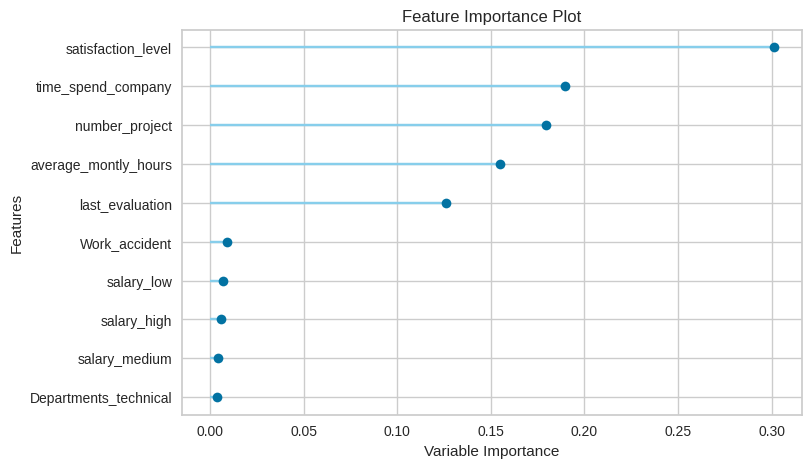

In [ ]:
plot_model(rf_model, plot='feature')

# **Create a feature table**

In [ ]:
# feature name
rf_model.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments_accounting',
       'Departments_support', 'Departments_technical',
       'Departments_sales', 'Departments_RandD', 'Departments_IT',
       'Departments_hr', 'Departments_product_mng',
       'Departments_marketing', 'Departments_management', 'salary_medium',
       'salary_low', 'salary_high'], dtype=object)

In [ ]:
# feature value
rf_model.feature_importances_

array([0.30110658, 0.1259243 , 0.17920058, 0.15511409, 0.18978115,
       0.0088762 , 0.0015364 , 0.00194865, 0.00290416, 0.00367545,
       0.00352838, 0.00186797, 0.00168919, 0.00183491, 0.00148181,
       0.00135336, 0.00152958, 0.00396984, 0.00693197, 0.00574544])

In [ ]:
# final table
import pandas as pd
feature_table = pd.DataFrame(zip(rf_model.feature_names_in_,rf_model.feature_importances_),
                                  columns=['feature','importancess'])
feature_table


,feature,importancess
0,satisfaction_level,0.301107
1,last_evaluation,0.125924
2,number_project,0.179201
3,average_montly_hours,0.155114
4,time_spend_company,0.189781
5,Work_accident,0.008876
6,promotion_last_5years,0.001536
7,Departments_accounting,0.001949
8,Departments_support,0.002904
9,Departments_technical,0.003675


In [ ]:
feature_table.to_gbq('EmployeeData.feature_table',
                     project_id,
                     chunksize=None,
                     if_exists='replace'
                     )

100%|██████████| 1/1 [00:00<00:00, 7752.87it/s]
